In [43]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, mean_squared_error
from scipy.stats import skew, kurtosis, iqr
from sklearn.metrics import confusion_matrix



# Data colection


In [36]:
folder_path = '/Users/ALONA/Desktop/Go_IT/HW/Data Science/Data_Science/HW_5/data'
dfs = []

for root, dirs, files in os.walk(folder_path):
    for file in files:
        if file.endswith('.csv'):
            file_path = os.path.join(root, file)
            df = pd.read_csv(file_path)
            folder_name = os.path.basename(os.path.dirname(file_path))
            df['activity'] = folder_name
            dfs.append(df)

combined_df = pd.concat(dfs, ignore_index=True)

combined_df

,accelerometer_X,accelerometer_Y,accelerometer_Z,activity
0,1.757344,-5.875371,-3.878607,running
1,2.461239,12.986150,1.762132,running
2,22.682667,22.922087,-1.738190,running
3,11.875240,4.611233,-8.389283,running
4,-5.295974,4.783615,-1.273715,running
...,...,...,...,...
193855,-4.137180,-4.429273,-1.517924,stairs
193856,1.829170,-9.313444,-0.330400,stairs
193857,-7.350199,-12.670115,-1.460463,stairs
193858,3.969586,-6.320692,9.255983,stairs


# Training on the output of normalized data

In [37]:
features = ['accelerometer_X', 'accelerometer_Y', 'accelerometer_Z']

### Data normalization

In [38]:
scaler = StandardScaler()
data_to_normalize = combined_df[features]
# Нормалізація даних
normalized_data = scaler.fit_transform(data_to_normalize)
# Заміна вихідних даних нормалізованими даними
ndata = combined_df.copy()
ndata[features] = normalized_data
ndata


,accelerometer_X,accelerometer_Y,accelerometer_Z,activity
0,-0.019775,-0.599143,-0.790301,running
1,0.063974,0.912923,-0.005946,running
2,2.469899,1.709454,-0.492672,running
3,1.184042,0.241533,-1.417518,running
4,-0.858972,0.255353,-0.428086,running
...,...,...,...,...
193855,-0.721099,-0.483214,-0.462044,stairs
193856,-0.011229,-0.874762,-0.296916,stairs
193857,-1.103381,-1.143855,-0.454054,stairs
193858,0.243435,-0.634843,1.036086,stairs


### Divide the dataset into test and train sets

In [39]:
X_train, X_test, y_train, y_test = train_test_split(
    ndata[features], ndata["activity"],
    test_size=0.3,
    stratify=ndata["activity"],
)



### Learning using the SVM algorithm

In [40]:
model_svm = SVC()
model_svm.fit(X_train, y_train)

SVC()

### Learning using a random forest algorithm

In [44]:
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)

RandomForestClassifier()

### Comparison of the accuracy of the results

In [45]:
svm_score = model_svm.score(X_test, y_test)
rf_score = rf_model.score(X_test, y_test)
print("Model accuracy SVM:", svm_score)
print("Model accuracy Random Forest:", rf_score)

Model accuracy SVM: 0.8937205543519379
Model accuracy Random Forest: 0.9995701365246398


### Prognostication

In [46]:
y_pred_svm = model_svm.predict(X_test)
print("SVM  - Classification Report")
print(classification_report(y_test, y_pred_svm))
svm_accuracy = accuracy_score(y_test, y_pred_svm)
print("Model accuracy SVM:", svm_accuracy)

y_pred_rf = rf_model.predict(X_test)
print("Random Forest - Classification Report")
print(classification_report(y_test, y_pred_rf))
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print("Model accuracy Random Forest:", rf_accuracy)

SVM  - Classification Report
              precision    recall  f1-score   support

        idle       0.96      0.99      0.97      9351
     running       0.93      0.90      0.92     30672
      stairs       1.00      0.00      0.01      1485
     walking       0.80      0.90      0.85     16650

    accuracy                           0.89     58158
   macro avg       0.92      0.70      0.69     58158
weighted avg       0.90      0.89      0.88     58158

Model accuracy SVM: 0.8937205543519379
Random Forest - Classification Report
              precision    recall  f1-score   support

        idle       1.00      1.00      1.00      9351
     running       1.00      1.00      1.00     30672
      stairs       1.00      0.98      0.99      1485
     walking       1.00      1.00      1.00     16650

    accuracy                           1.00     58158
   macro avg       1.00      1.00      1.00     58158
weighted avg       1.00      1.00      1.00     58158

Model accuracy Random Fo

### Error matrix

Матриця помилок (`confusion matrix`) - це таблиця, яку використовують для оцінювання продуктивності класифікаційної моделі. Вона дає змогу порівняти фактичні та передбачені класифікатором мітки для кожного об'єкта в тестовій вибірці.

In [47]:
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

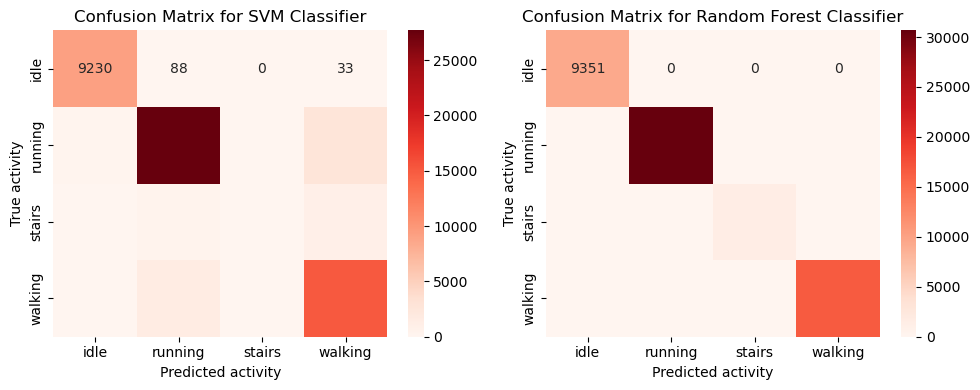

In [48]:
activities = ['idle', 'running', 'stairs', 'walking']
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

classifiers = ["SVM", "Random Forest"]
confusion_matrices = [conf_matrix_svm, conf_matrix_rf]

for i, classifier in enumerate(classifiers):
    sns.heatmap(
        confusion_matrices[i],
        annot=True,
        fmt='d',
        cmap='Reds',
        xticklabels=activities,
        yticklabels=activities,
        ax=axes[i],
    )
    axes[i].set_title(f"Confusion Matrix for {classifier} Classifier")
    axes[i].set_xlabel("Predicted activity")
    axes[i].set_ylabel("True activity")

plt.tight_layout()

plt.show()


# Time domain features


### Вибираємо ознаки

В [статті](https://www.sciencedirect.com/science/article/pii/S1877050916322153) [1] пропонується обрати наступні часові ознаки (таблиця 3). Як пишуть автори, їхні результати показують, що найбільш репрезентативні ознаки отримані з часового представлення сигналу акселерометра. Ознаки, витягнуті з сигналів по осях $x$ і $y$ є більш релевантними, ніж ознаки по осі $z$ при визначенні активності. 

| Name                          | Axis |
| ----------------------------- | ---- |
| Maximum Value                 |   x  |
| Minimum Value                 |   x  |
| Entropy                       |   x  |
| Interquartile Range           |   x  |
| Maximum Value                 |   y  |
| Index of Minimum Value        |   y  |
| Mean of Absolute Deviation    |   y  |
| Median                        |   y  |
| Skewness                      |   y  |
| Standard Deviation            |   y  |
| Root Mean Square Error        |   y  |
| Skewness                      |   z  |

In [49]:
def iqr(data):
    """Calculates the interquartile range (IQR) of a dataset.

    The IQR is the difference between the 75th and 25th percentiles of the data,
    and is a measure of the spread of the middle 50% of the data.

    Args:
        data: A NumPy array or Pandas Series containing the data.

    Returns:
        The IQR of the data.
    """
    sorted_data = np.sort(data)
    
    Q1 = np.percentile(sorted_data, 25)
    Q3 = np.percentile(sorted_data, 75)
    
    IQR = Q3 - Q1
    
    return IQR

def argmin(data):
    """Returns the index of the minimum value in a dataset.

    Args:
        data: A NumPy array or Pandas Series containing the data.

    Returns:
        The index of the minimum value in the data.
    """
    return np.argmin(data)

def entropy(column_data):
    """Calculates the entropy of a column of data.

    Entropy is a measure of uncertainty or randomness in a set of data. It is calculated as follows:

    ```
    H = -sum(pk * log2(pk))
    ```

    where pk is the probability of each value in the data set.

    Args:
        column_data: A NumPy array or Pandas Series containing the data.

    Returns:
        The entropy of the data.
    """
    
    hist, bins = np.histogram(column_data, bins='auto')
    probs = hist / len(column_data)

    probs = probs[probs > 0]

    entropy = -np.sum(probs * np.log2(probs))

    return entropy

def mad(data):
    """Calculates the median absolute deviation (MAD) of a dataset.

    The MAD is a measure of the spread of the data, and is calculated as the median of the absolute deviations from the median. It is a more robust measure of spread than the standard deviation, as it is less sensitive to outliers.

    Args:
        data: A NumPy array or Pandas Series containing the data.

    Returns:
        The MAD of the data.
    """
    mean = np.mean(data)
    
    absolute_deviations = np.abs(data - mean)
    
    mad = np.mean(absolute_deviations)
    
    return mad

def rmse(data):
    """Calculates the root mean square error (RMSE) of a dataset.

    The RMSE is a measure of the average difference between the actual values in the dataset and the predicted values. It is calculated as follows:

    ```
    RMSE = sqrt(mean((y_true - y_pred)**2))
    

    where:

    * `y_true` is the actual values in the dataset
    * `y_pred` is the predicted values

    The RMSE is a good measure of fit for regression models, and is often used to evaluate the performance of a model on a held-out test set.

    Args:
        data: A NumPy array or Pandas Series containing the data.

    Returns:
        The RMSE of the data.
    """
    
    mean = np.mean(data)
    
    squared_errors = [(x - mean) ** 2 for x in data]
    
    rmse = np.sqrt(np.mean(squared_errors))
    
    return rmse



### Creation of a dataset based on the features specified in the article

In [50]:
axis_aggregations = {
    'accelerometer_X': ["max", "min", entropy, iqr],
    'accelerometer_Y': ["max", argmin, mad, "median", "skew", "std", rmse],
    'accelerometer_Z': ["skew"]
}

data_tdf = pd.DataFrame()


for axis, functions in axis_aggregations.items():
    axis_data = ndata.groupby(["activity", ndata.index // 30])[axis].agg(functions)
    
    multiindex = pd.MultiIndex.from_product([[axis], axis_data.columns])
    
    axis_data.columns = multiindex
    data_tdf = pd.concat([data_tdf, axis_data], axis=1)

data_tdf.reset_index(level=0, inplace=True) 

In [51]:
X_train, X_test, y_train, y_test = train_test_split(
    data_tdf[features], data_tdf["activity"],
    test_size=0.3,
    stratify=data_tdf["activity"],
)

In [52]:
model_svm = SVC()
model_svm.fit(X_train, y_train)

SVC()

In [53]:
model_rf = RandomForestClassifier(n_estimators=100)
model_rf.fit(X_train, y_train)

RandomForestClassifier()

In [54]:
score_svm = model_svm.score(X_test, y_test)
score_rf = model_rf.score(X_test, y_test)
print("Model accuracy SVM:", score_svm)
print("Model accuracy Random Forest:", score_rf)

Model accuracy SVM: 0.9731820526044352
Model accuracy Random Forest: 0.998968540484786


In [55]:
y_predicted_svm = model_svm.predict(X_test)
print("SVM  - Classification Report")
print(classification_report(y_test, y_predicted_svm))

y_predicted_rf = model_rf.predict(X_test)
print("Random Forest - Classification Report")
print(classification_report(y_test, y_predicted_rf))

SVM  - Classification Report
              precision    recall  f1-score   support

        idle       1.00      0.99      1.00       312
     running       1.00      1.00      1.00      1023
      stairs       0.00      0.00      0.00        49
     walking       0.91      1.00      0.96       555

    accuracy                           0.97      1939
   macro avg       0.73      0.75      0.74      1939
weighted avg       0.95      0.97      0.96      1939

Random Forest - Classification Report
              precision    recall  f1-score   support

        idle       1.00      1.00      1.00       312
     running       1.00      1.00      1.00      1023
      stairs       1.00      0.96      0.98        49
     walking       1.00      1.00      1.00       555

    accuracy                           1.00      1939
   macro avg       1.00      0.99      0.99      1939
weighted avg       1.00      1.00      1.00      1939



/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [57]:
conf_matrix_svm = confusion_matrix(y_test, y_predicted_svm)
conf_matrix_rf = confusion_matrix(y_test, y_predicted_rf)

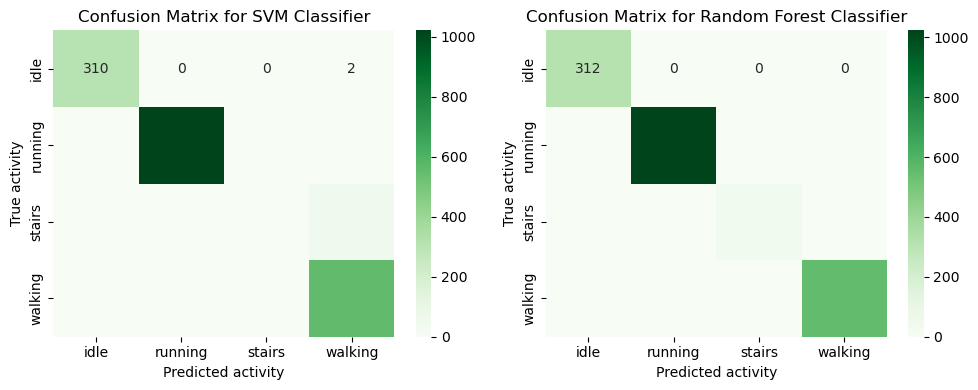

In [58]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

classifiers = ["SVM", "Random Forest"]
confusion_matrices = [conf_matrix_svm, conf_matrix_rf]

for i, classifier in enumerate(classifiers):
    sns.heatmap(
        confusion_matrices[i],
        annot=True,
        fmt='d',
        cmap='Greens',
        xticklabels=activities,
        yticklabels=activities,
        ax=axes[i],
    )
    axes[i].set_title(f"Confusion Matrix for {classifier} Classifier")
    axes[i].set_xlabel("Predicted activity")
    axes[i].set_ylabel("True activity")

plt.tight_layout()

plt.show()